In [2]:
%matplotlib inline

In [3]:
from urllib.request import urlopen

import numpy as np
import cv2
from imgaug import augmenters as iaa
from matplotlib import pyplot as plt

In [4]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, JpegCompression, RandomGamma, PadIfNeeded, RandomCrop, Resize, DualTransform
)
from albumentations.imgaug.transforms import *

In [5]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
import random
from albumentations.augmentations import functional as F
from albumentations.imgaug.transforms import IAAAffine

class DoNothing(DualTransform):
    def __init__(self, always_apply=False, p=1.0):
        super(DoNothing, self).__init__(always_apply, p)

    def apply(self, img, **params):
        return img

class AdaptivePadIfNeeded(DualTransform):
    """Pad side of the image / max if side is less than desired number.

    Args:
        p (float): probability of applying the transform. Default: 1.0.
        value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.

    Targets:
        image, mask

    Image types:
        uint8, float32

    """

    def __init__(self, border_mode=cv2.BORDER_REFLECT_101,
                 value=[0, 0, 0], always_apply=False, p=1.0):
        super(AdaptivePadIfNeeded, self).__init__(always_apply, p)
        self.border_mode = border_mode
        self.value = value

    def apply(self, img, **params):
        size = max(img.shape)
        return F.pad(img, min_height=size, min_width=size,
                     border_mode=self.border_mode, value=self.value)

class RandomPercentCrop(DualTransform):
    """Crop a random part of the input.

    Args:
        height (int): height of the crop.
        width (int): width of the crop.
        p (float): probability of applying the transform. Default: 1.

    Targets:
        image, mask, bboxes, keypoints

    Image types:
        uint8, float32
    """

    def __init__(self, percent_height=0.8, percent_width=0.8, always_apply=False, p=1.0):
        super(RandomPercentCrop, self).__init__(always_apply, p)
        self.percent_height = percent_height
        self.percent_width = percent_width

    def apply(self, img, h_start=0, w_start=0, **params):
        height, width = img.shape[:2]
        return F.random_crop(img, int(self.percent_height*float(height)), int(self.percent_width*float(width)), h_start, w_start)

    def get_params(self):
        return {'h_start': random.random(),
                'w_start': random.random()}
    

# SIIM Project

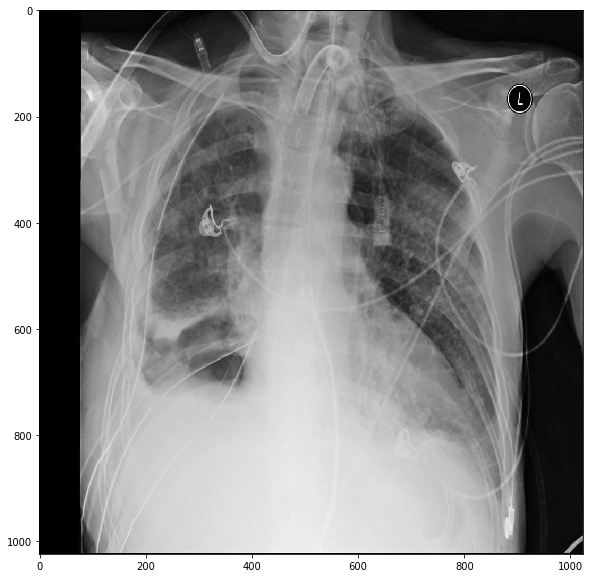

In [7]:
# image = download_image('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUTExMWFhUXGRgYGBYYFRgYGBUYGBoaGRoYHRgaHCgiGBolHxgVITIhJSkrLi4uFx8zODMtNygtLisBCgoKDg0NFQ8PFS0ZFRkrKy0tKy0tLSsrLS0rKy03LTc3LTcrLSs3LS0tLTc3NzctLS0tLSsrNzctKy03LTctLf/AABEIAL4BCQMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAIDBAYBB//EAEIQAAIBBAADBAQKCgICAgMAAAECEQADEiEEIjEFE0FRMlNhkgYVI0Jxc4GR0fAUM1KTobGztMHTYoLh8UNyJISy/8QAFwEBAQEBAAAAAAAAAAAAAAAAAAECA//EABoRAQADAQEBAAAAAAAAAAAAAAABERIxAiH/2gAMAwEAAhEDEQA/APcaVKlQUOz+1UvMyqGEAMMgIdCWUOsE6lWG4OukETO3HWgSDcQEaILrIPl1qpwHYqWi2y4Ki2FYCFtgs2MRscx6+Qob2VZt27LfJrAvcQAAqiB+kXQAPIVJmliBz4ws+tt++v40vjCz62376/jQxbls/wDxj3Vp02/Vj3VqaXIj8YWfW2/fX8aXxhZ9bb99fxof8n6se6tRWWX51tJ9ij/NNGRX4ws+tt++v40vjCz62376/jQwtb9UPuWnKbfjbA/6rTRkR+MLPrbfvr+NL4ws+tt++v40Om36se6tL5P1a+6PwpoyI/GFn1tv31/Gl8YWfW2/fX8aGFk9Wv3D8KWSerX7h+FNGRP4ws+tt++v40vjCz62376/jQtrlv1S/cPwpovIf/iX7h+FNGRb4ws+tt++v40vjCz62376/jQo3E9Wvuj8K53qerT7h+FTRkW+MLPrbfvr+NL4ws+tt++v40Ia6B/8ae6K6rKR+rT3RV0ZFvjCz62376/jS+MLPrbfvr+NCgB+wnuCliP2U9xam1wK/GFn1tv31/Gl8YWfW2/fX8aFY/8AFPcFcBHq090U2YFvjCz62376/jS+MLPrbfvr+NDAAfmIP+op2C/sJ7gpswI/GFn1tv31/Gl8YWfW2/fX8aH4L+wnuj8KaQvgie6KukyJfGFn1tv31/Gl8YWfW2/fX8aGgL+wnuikyDwRPdFNGRL4ws+tt++v40vjCz62376/jQgkfsJ7oqzw1tTMovuj8KaMilq4rCVII8wZH3in0N7AUC2wAgd7e6fWtRKtMlSpUqBVneBHyL/X8T/cXa0VZ3gf1T/X8T/cXaz64vnqWymqlxFMstP8KddPSsxxsmTVca3TO+UaLCddSOp6V1r4GshP0jVBwqa4orhujoWH3jx6f4p+UiZ17KimkU5BXMh5/wAa4iiSfs60HXHspoWnE0g3toG4f5rhT+NSBddaaaBuNMYCaezRJ6+Ot/y61wmft/PSg4DXQaQtfTXVEUU4U5qYRSB+mg6RXZ/CmnpXR9NQSU4D2VGtOLgDevD79RVQ+a5XB9JpCD4/xj8+NAgK4X8Ka95R6TAdOp85j+R+6k42I/nVDhv7Km4URNRRU3D+NEk7sP0H+tvf1GojQ7sP0H+tvf1GojXRzKs38JuEvMxbhwTdNsokryoSH5xcnkYFh5zArSUqAP2DYZUu4obal5so/VF7u2DInQNwXDE+Ptqp2ZPcmYJ77iJjQJ/SLswPL2Vo6z3Z/wCqb6/if7i7WfXF89WbQ1FcuDp9NOVYpXPD6f8ABqNA3HcTF3uwpYlcjE6AIHl460I8fE1x7gJuI7EAkSCeqkSdk6BWRAAjFvpoX8IwoultFpUBQWPPAIZlXRMJjHWB1USaqfpVsurtoTAYqwjJVd4IYBlhUg+lvoTBIE+EZWYqM5QqGL9XGOpJ66YHrPsFWey+PaCjITBIylDOzBhTyqQsyY8vKQnEw4kk+M7gLJghmMglTAKyek49Y6We5aYd46sMQ7CVYGdEb0ZHUiCCRJEGorWmRVLi+2rNllV55ujRyidgk+P2THjAqgtrvQ3dPlIABaWtkwOboQQInXiOpmrHEdmKqFrhGIlixTNkGpCiCTIHjJ6ACNUBWzcVxKkEHxB/O6lUVU7IUCxaxBChEABiRCgQY1PnA6zVskg9Pz50Uh/CuCnAVxjQR/TXAJPsqQKT1pBdDc+3z+6oHRTacKjdoknp/KgRWq36RltRI+0NPhEiPvIqRxkCIP2xB9hE9CNx5HfiKjBiOYwsSW2W8IKjxj2DZHXYoqxOyI6fx/PSnCP/AF99R631kmOnTXQkDQ1Mnz+gVDbEv4gr57GJAbW+hLRr9n2QSLDsQOkmJAHifKftqUW52esRonp4eUGoJVSTOyepHiB/H/3U5f2UHTTLsaMEkTETM4n/ABPXxjxpBxJ2I34z9vs6NqkLZBMxE6gRrROXmcsj9BqoHcXkVCgAJ4m4xDDyIHnEmZ+aT1GyaDQEzrrQ7irCAXLg0WJ3LMMhADEAxKlfDpFEB0Xx0Pz4UDpqbhzUCmRvrU1jr9lCT+w/Qf629/UaiNDuw/Qf629/UaiNdHMqVVu0uIa3ae4q5lQWxLYyBs7gxqfChfE/CLAsTaJUcqkMJa73a3AkRoENGU9QdeNAdrPdnfqm+v4n+4u0V4Hjs7bMwxKMyuAcgChIMGBI1I0OvShHZbg2WI6G9xBH28Rdis+uL56up+fuFJ/D8+FdBpP4VGmX7YsxcuRkS2Owpc25UjJRsRqT6II1smqXG8GDeyFtQBCqz2w45syViYDM2vBhlBBkUX7QtB3uo4JttjODhWnl5CZXR8tzJ9lUv0xGQtiC6YtiADAXWKyFZ15njqZJHjFBQhbl1tE3FW2WEgG0JR4tr0mSBl4RupbVhw63B3WRY94WB1uASYAuEGQMjHKupUxbFq615CXcBTmsqii4pSYHNn1ZvSWfMzBp/Ec9oYqLTggZMLfJzKW2CQMgSuzPNMTEwX7nF8PYOAKpALNo9TJksBtji2zskHrRF7YYFT0Ouv5igHbCh7YS4shiDiXJEAgnYbJiIB5QdsBsZGr57VbvbaFPT8clPzZ5RMncbiIPXwBRG1bVQFAgAAADwA8KQNPps0EPCsxHOIOTAbGwDynXmIqRh7Kj7PYlOYQZOpJ8T4kAn8xU7CgalcI6ap4FNYHwopj3AP8AAAknw/zUbTInfiDiNSfDcmBo/wD2HSuOzSRGhiRjsmDzSD4dOm4mN0/OIGh0BkydiAevmD16xQNNsa3sTGyx2fad+HXpqnsnsgCPICBBH3REe2u2nEajWjHmNdPCu5akiOvj/GoOBlEAfwHQfk1CyIABPnALkByeoP7RO/A09UmDPh4dPAz/ACqOzwwUzAkT4SdwOv0KOvjQS2XkaM+UDyJHXz1B+jwrgHzjrRPMZx0ARExEDp08aaWI3zNs9AABEjpMkH7fOqHHcSZw7lzAHMGAUSQmjOQgOxmBpT7Jos8TfugSMUVWBy02SlvRAOOJI1O9nxqbh+KFwjHKFMnw3zAqwI14a+g0NPDhjls+hoAEjbNEmSTzEb5QDqrnBqV5if2o9s7gtsmMTuQI8KIdeaJSJDSB83ZybbDpvxAnmmNSb4gQPZA+wULHErllA5jcAlokrpiRHmkT4CPMgEwekeWjQOFPsHdR0/hhs0EnYfoP9be/qNRGh3YfoP8AW3v6jURro5oeM4YXEa2xIDCDiYMHrsdKHn4PWDM5tKkGXY7KhM+unxUDLrqi1Kgg4PhVtLisxJJJMkliSSSepkmgnAn5Jvr+J/uLtaKs72f+qb6/if7i7WfXFhdWmv4fTTlptzwo0C9qXCHOI6kKSCCIgtBBdcT02PCPEiBHDgtcuOt+4xE2iOuIJY5gITHpdQF9AnoKs9r8Qbb3SROYICZuCWCiDkTjb0pPKCSN+DAZ7sn4RqktdBUyOYXcwvMFUAE+gRJJeIjxMRATt3/lGJAMTj3iFnxJAgmAMASTIJ6jyE2l4tFujEAhrg6BxkZQA4gGDOixMHD/AJSBPZHaa5coVlUBs1Rcr0syibaqpEEiAD0UyZq7e4Vu8fFLAUlCeSHuMWUBZcR4KD0gkDRlqCtx/EgXTi/KCTAGRFy1GdtrZnEEjUMJgQeXbQ11WJuXsEACgyQBchyYLCCPHqdDYgSZezSMAApUgqbgIJyCkhlj5zEq45Rs+EwSSuWAAMvR5lHonBQAAqmJk4gEGfnTpdwaPg72aKwgyAdGRseynXrkAt5AnrHQedD+BupasKWLBWGRBBOMiTOpAHTYHTe6sdqLlZYAwGHUeIP49KqoOw+LDhwMBDSAhBGLCQ0DpJyHtxoiTQf4P24a6cg4LDauGBImeigKfZuPM0U4i+FBZug/jUDwa4aAfCbts2rTCz+swcho0mIaSZB3IiIP2dRV4ftW8ltbhuWmUKM8iwCaJJa7sz0HQ7YSfGgNyO+ZdbUZEMZB8Ad610j9o1YS2qiAAANCFgL4mIHTxrPdo/CBFchCxaApKKXRTBglh4SRvH/w3g7iX2BVixLAsrM82ijyBBMLrWI1OXlQaDMaI3/28OhOjvw++u3XA6uinQ2JhmIC+ImSQI0TIqNbKrbIggKGPKWJgydRzAnyHnA8KzvaXbLFHa2VKkhVBVbkyMiSJGMSowJkmBCyDUVH8IPhYbNwoi5lUy0WhbgjRA9NcbizB1E/QZ+DHaX6RYa5oKXKoFliFGIByiTJlpPQMJ6GsJx3EC6lqyTpQXvPceJYyhYLJxTIfOEjJR5QQ+Cr3LF4lVduHNsEECZkhu8DMwyjJgwAkBV14VWbartTiccse8bk0FkZMfRhyCJ1GtyRIMiIFtd4VuC2xIHzmYDkYxoQpMgHLc4iJ0aj7R4iboXmDMq4NlCBmloG+Ywh0wAJVevg3hmMmU1JMIInQxBYBTkcgh9ijzNFTcVxF4dSgOQCyQG2WU46YGRgfD0zOMUT4W93jNzeicSmuuKzPnufLr9FVEsK3NbgY69AHoCAZIlh5EEa+mm2rbBlfIQWJudRlrEdNGGwgkBsQB55BN2gqAsQCCNqRrJiNj7gJbpBOxjosPmj+X40KtybxYAaJXrzAbM6GlMHrOyYiNkrR0vt/lQSx7afwq7O/L7KZFO4Y7oJew/Qf629/UaiNDuwvQf629/VaiNdHMy7dVQWYhQOpJAA+00z9KtyVzXICSMhIHnHlUPbFkvYuIEDllICmIJOh11rr9lAeJ7HvuLgRcO8txcDOpV2CIqqIBKzjBMxE6M6DT2risAykEHoQZB+0UB7PHyTfX8T/cXaIdk8Iy23Dchd7jhQQe7DGQAek+P0k0O7KEWSJJi/xAk9T/8AkXdn21n1xYXVFM4gnUedOFK4f8/yorA9t8D3t/iE7lWNw28iVZjgqIMwA6xBLLIOU9A06BWu7aS9xCxAIcKyOwZQZyNs5sQIIBAidA7rTfCXm77FOYsCCQSAVtrHKFgNDtuctGJiKFcJwqC0zi2DhdAYBc3DKJELvquLs0zEQSRNRS7O7pMLjkiczKm0UWSGIxUsfRMjZMjoaJcZYWJ5YVsgStovtmDb9HSsyiAWhIkycYOPwNu2TZtMVZiiYBi23BthFtmC5QnoQYboYh3C9l3Ht20e33hIbn7ohcCWKEyJKgjLAsNsKB3BcMgXHB5YQxOLAIrDlcoTnkCwVYEYYwN1Y4nilXBWZSHJxYGeYEEa2A0ktrXifI1u4e4FuIptGcVU2drLMsMpEZFcYlo6iQTvnbzY21DEKrXcue4E2zwUWQs4CXxJnR1MQBTiuLm0MwbQBdTBOm2vNi4kNJhRJJOiDFR9ocUxTu3VH74qQrNipjFYAecfAxuTJ3VfsXh794AqSiHTFkdRylWGChwGVxuQSBJALCu9s97wqS1xWVQxDbDOWYQMFiSuSj0t9fGgs9ns63A0KNuvMxgkkZYwoOM7lgegAO5qTgO12dHnEwDMMrSJIMElRsKTHTnBoPc4d3uSwZUNzEsSpLFNoDKjRY4jc7x6Gn8KTJJQYsQwVbjK9wYrJFqWM9F5einY8KAh2rw/esjMmNu2xzQwGcscQxjRTmb6T/xMmrwnZrYstsqOHuO7MCZY5EwioIRd5QdjS9QNycdZITvOVHSSUdYUjeAy5cDniZEwVXUmoez+NVRBPyTd+WydmJBxIbLHoFYvOUczDwBqKt2fghYInO46kTBectRJJ6kqSPAbMAbJg7Q4KzbdGtHY5v1kIVbXoyM4z0QPPezJHg+MDIy6xBCoQO8QtGYIPjAI5dAFYFZfjTm4tqYn0UUOYloKs67CuQFZSFgx1PUIeJ7XuLZe3buuLtsg7eSy8xxUmTrklpOxsgTUfFc1tbalrttw/wAmVZJXxZAFCNbkQQwnZIjGSK7f4U2WRHuFhzqgVe7KoBsFoYnPMTkkSFI0RRH4N3vRuEu7QMR3astsN3ltYiC2IYkhQBGZ6zFQ/iLot5d4SHuWirQpBPdCHtwTmEkmYJ+d0EFXdhcaciAPk2uMCMwxt5opxUICuJ7pDowTdaAxGNc4xReYd2wa3cVhbfmVQ9w7tuI5JZWILsxIYdSwIHdlcaLDO1vaEW4aZVWDgopOoLQzZEKJ1AGyGu4ewjoAR8rynCGgtcXJjJ24BF07IkT4wa7wPHrlJBk5YlpyUbkMC2fLifLquuhMFi2wRWW3gzAARcUFgQ2CBhE45RIJyBYiJFU7fHY5yhIZ8smBNwsmJiSpJ9AKVIEBSYgRUUXvtgHuPgspGSBw0NrvTAY3DjsGNcwJPha4Ti3CMLqCCAqFZZoDGciSYPo6HzmiqXZXBXnjlXutBxeli5XR1A2T1OyCNgnQl7Zt3FbO1aWViQGbHmyl8EUywZidrJ0ZBGgLWnR2Y4DFbhDbJ5liWPgNBftFX+zmytWyPEDrsxFYjsjtc94ysCpYSAFEyoZiEy30KsBsAQfnAVruwmJ4awSIJtoSPLl2JigKV2x1phOtfn7Kfw3Wgl7C9B/rb39VqI0O7C9B/rb39RqI10cypUqVAqz3Z/6pvr+J/uLtaGs92f8Aqm+v4n+4u1n1xYW0Gq5c8KeBTLh6fTRWN7dUPecO3dhSCrF52UwnGIAycqNiT9zAF7PFu2BjDZAXQWc8+KhTJADc0HGemREya0XHsHvXlGQZXBb0fSa0oBBnL0XjXQBtgkECrr2r9wM6wqlHZXBBm4rAgnIKsEAHxHMSMRUVe7A4Jrdq5cyuXCAhCBOYd3AGILLmxWJ2FkHVaPs3tHLFXtupb0WaMbjQzEAhjBhSY8AD5Vkri3OGFy+GJZrbKMHMs5Ulcs2ZTiFY6IIAJ8dW+yuLd7LCWQMy44o/IAqgBA5gidzsdOjRQEOK7eW3xPdAs0GXU4nE46VSWkMSfYoC+GyaHwz4Xv7iWQVLG4jKC3hCgnUwOVoWDJBMQSRR4zhUki4brsuDC5zEqUg5RbyZX2VLEL7AB1lucW54i0SmldjmcXtlbhxVkOgnKD/HqSJC32N8IkszavBEtooFu6oIRgoAIJkgRIWWYSZ11ibtYvcUtaQuCSWIYxAABiCQ3KWXGfSPQxNC+G4W2e9R1Lb2QrsmLXGxxxEd4Q2gJCwD0mXcO6D5GXtopHMpuIzQBdKMwMZYsxkEHQEGKAjbdQrpeQWra5BGyXEoCceVtiBG13sAdNSW7ohrbvAUIe/BBUE8+z8wRG9ecgkUG47heKN24Q3yfMnOCSEBkHajNQGggk6mNzBXswlmsrOJRQbiYDWU4BSWOKEhsYkgLE9ageDiFs3lZ3uoeqqSiBcjbLllJ6NESZB3qazXafaZS0Avd936NyCrlyOgVSxCGGyKliIgDIBoNdpt3Fpr8m4w5CGdwqsIt9JMEhjoRJYdBsZztnhyyWzPc8rMhBUle6CrMWyAFIuZZKOvN0JoLXAcblss7G2qTcxCBcoYsdjLZEHxUHzmrN/jbS3P1iqoCzJjmJxVyywVYYnISP1iglvAXwF2MLLqwfJH71WyNwlf/svpErESeSfAkP41JW4jNZxZQSc2LIAcgEXlzlVyBAM4xLdQFTta2nEOSrHLAE3ZLLJGXKGONtCAFB5ep6/OIdncVbs2gmUCRiCzMBcLnLIFiI5F5oUjJiADqgS2+I4kPyCbbSyGT8mxPIELSRkmlBnUjwJLHhu8cIbhZpAR7Sq2QJZmxzLMrFMjHQsIBJGIor3uFRbciBp8jcNxszPRUDEMVDFDBAGJM7p3YXChgyFuX/kVAMhzbac5yyVV0RGMCIDVN2zwYDWyzXWuc5AVjgBrkNxyFVNNJiBIUyRR/hgtq3w5cFyBcyKgD5PahWMGBLEjmAJne4Id4lLSXHKjJz3ZuBFcNJUkmMtAgLuQJ6kyQKnDmL6ttltuwIdpOZjmUmPBQMMQAEbYrlu4N45cwZmBG3yZMsUIwBGbqV2ZYiDBqfsjtK4eUOU5oIW2D3RLH5sNILSJlhzg+G4rUdncWWZlORMDqoXHW5B2JPTXnHRonW7kzDuiQpABgYsdTExsH+X2ALwt8d5IC5M3oZ/OVS3KD0PpEyAZ8IINX3ud+udsmY0raEqYJgjXVhl46I8DQAL9xWV7FvIm18mpOcvPMUZupJQZZEgbHhMajsee4s6g4KI/6xWK+EVspxDyGIuBYGoBMBwWI0CIInXJ7CtbfspSLNoERCrqZjX7Xj9NBdIp3DDf2UzGn2Dugl7D9B/rb39RqI0O7D9B/rb39RqI10c0PG3MbbMXCAAkuYhQNkmfAVlx29xCgu2Jx9G3jD3VYXXRomVYqi8seDfZq7ttWBVgGU6IIkH6QetRWuCtKQVtopUEAhFGIPUCBoGgodh8e7rdzIuG2ygMixmGtW7mhPWXI+iKqdlGbJMETf4jR6ieIu6Pto9YsIgxRVUeSgAb66FAuzj8k31/E/3F2s+uLC6KY/h+fOnA026On0/4orz/ALX4W6OLcWcVa5EZL0wRAVDjLM4sWMBdCCY63T2WyZs474pi2KhSUXRW0EAghZYjr6UgDFRRLi+yGe81xhyzCYtuCqg8vnIbfkaSdk3kBRWAUkHTOBAiQssSJj2AT4kmIrP8VwqFBbvPbtqS4VcWS4LjQUcCJZuYghQBzkSaIdjEDJQ3E3Fdcg4QFQIK4h2WWMJG13M+Io0ezGZwzYMoXHFgW/Z3s60HEeMiZq1wyXVHObcQPQQrGz5k6iP4/YFRli0z2gy3Pmi4bhAjUYrMKPICDAPtrN3GtPDEoGDgPgysAQzqGIxkqSoaWXlxkbE1ulGt/bHjQ212HwyOzraALkMwBMFgIBxmBr2UFRe2kNsY43QoXIZCFjUl2JBJGxvYMyZqp+kq4Ze6ukoxEFYcm6oJIMGNlhJC8ra0BOnTlAAAAAECPR9mteXSsR8Je2b7X7nDBTbRQCbgkd6MUJVWkQJuROtoN7xoNGl9rsp8kj7Pd5AuNRMdQCct49CNTVPj+DZAEVrpY4wygxygwC+JCdG2IO9bisJwNlgLqG63exKvHPi6gcxALKw+UjoZbZ6CiPZ/bl7hWylrlllVma4zEHQkroEEHLWIOxogTQHUv3m7xXR1QtjiyMxaEBkcoBEmPI4eG5hPDm5dFz9FuIqtBdwqY4C4NrJyG5z+4wa1PC8ZbugOjBlYAgjyaYMeE0uJ4lQMS221ywSBvmg/5/jUVgO2eDci0lxDbLFiVQhoDK7OrkQMsTroDE6iBF2lmbVxyNYlLZUBu8XwOy6jlBJDrGJG13Jxu0OHvoRis2gzXXGpRAQBOWasTHpDWL+W6vaPYy927JwuBZCSGuFsD0VjzwZI9EDeKz4VUUPg/wBlOEZ0YAnIK5IkFGPMt1lkp0UmPnHy27jbJW+qZFrrDAEMoIHd3CYWYkZqDjHj0OzZfhGtKkWyyG4CMmNtQMg7MQOi94whDPiZiou1eCQ93euPbRlPdASUIORZTmSxgHJxIiAsDwqDnbnEhT+rDhlLIim6UZoQBVw8eWMlB2JhSQal47tBwFE2mDKWa7gotkMzgMCGY5gydBhLje6XHWrF0s3DuYsqzXijKoBYLCocYnK3kSenj5BnxUkoy8MS6KClsvlILkASCFUCbkHxI8TQVrfaA5rKy11mzCwFdCqjILoz8qgafGDrW4+z+z3S0q80yedZKGCI2Ry6GJmD1MnobdqwqW2Rktd5ynAXIdVKwDkWhoDAcmidAR0s/oKMpNoXg0q7ODliZCHRyMwARA/aIMaoIeM4ju7WAjkDKIALA2wVd2gEdRceSROh1M1e7L4kW7htG8BJUmWIIkKuM4iFgjH2nrPSqOwOIurKgogYct9gzKUAUXAQInXQj9rW5BHh/gtyBbrNqAYYANJ6FcT01G9wJmiqfwicDjF5GYi2IYKCTDMoyKncEFpAyABjpB2fCE4JMzA6iJMfnxrz+92TdtZAWwccgwYFmdJLHHA5YHLRJYnxGjO87LEWrYiNARvUDpQXSKVk8wpoNOsDdFT9h+g/1t7+o1EaHdheg/1t7+o1Ea6ORUqZeuYqWIJjcAEk/QBs1Q4XtyzcZlUtyglyUYBILAhiRCmUbXsoCVZ3gP1TfX8T/cXaL9ndo276lkJ0QCGUqRKhhphO1ZT9tCez/wBU31/Ef3F2s+uLC3Fcfw+n/Fdpr9R+fCikDXSa4sfb+fz9tNcEiJj+f2Gop1Mc9dfbrdU+LsXzjjcQRIYG2WzUjpphDSBvynW5qSxadcVEYKAJkzqdRjBjkEz5/aFsU1hNOPnXDQcaSNa+ydeP8JrM/CL4P3+JeVuogXDGVZtAkur7AdTKwP8Aj9BGoppoMN2r8D7pwKMrMVuK5BNtQGaQqoGIVSpZT5ekBNZ298HOLXkRC+J+TfuiANkgZXAuMFRvHejPQV6zArsChTzHgvgfx6vb5giLEy5Ag9VCofRjFevzfsrV8J2VfDu966t0gKEUKymFJ1pgJaB0AE+cUZsu8EMBlsgExrw3B9gJE7nrXbrXRGCIwjcuVM+yEM6nrHhQZq/xDLYmzw121hINpbJycLMqsEEidgxza6zU3GcDxXEWmZwFYhsbRflHQqOhBYEDmM7nUaOiRp8IP312Pz+foqWtMhb4Di8O7HDpChR8oytbOmJbZYuciCVYAEljMwRb47sXjLym2LyKIX5QoC2U82GuT2H2Dy3o8gJ31P8A41Tb65KVlhsbXTCCDr/PsmllM8vwY7iTaC3FKMGS4FIcMwcpiBiqnEDoaXY/ZN3uyOJyxkEWhJEK6usje5XoCT46mBobj5KwBZTBE47UxowwidzFcTqFEgQeoLdIiWYz9/XdClGz2RZttkUyxlpaXImdgsSZgQYG9RHSqvEOjlYLqLbFothrRgCMcMdhiZ5jsbmNApe4NWByBb2yAYbWojoCd9fpNcS2EAUd4w5uYkuV+d6TGSOgHXpQQcakoxdyqLJEXWTxM5Mo5VWN9fGabwqmTN5grRCtoqcoEMNRtQOuX31LxFtNAleUCAxAGgRiJnHUgmJg/dJ+lcOgg3bcH9q6D/8A01BJwlxj6YAPUEAgET0M+iw0CPZ9IFgDlHl/4NULHH2cp/SbZJgY95aIX2KQAx6+NELLBgCOn/v+FA+afZXmpipUlo7oJOw/Qf629/UaiNDuw/Qf629/UaiNdHNDxlt2RlR8HIIV8csSfHGRMUDX4Mg4B2tQqspZLJW6+QYMDda4xxOZJHidzWipUA3srss2lcO/eNcIyYLhpUW2oADGNLJM9SeggAd2UgFkgdBf4gDc9OIu+J61o6zvZzwhHnf4n+4u/jWfSwuimXj0+n8aQMUmWesfQaNOCKayiZjrqfYJ/E1IEFOqCu/DoeqqfpUH/FRvwNk9bds/9FP+KtxSoKI4Kz6pNdORfwp44a2OiJ5+iOp+z2mrcVyBQtWucNb8UQ/So+jyp4C+Q+6p4H5FKN0otAir4Afdv89adoVKK6VpRaqwEz/P+f8AimNYUmSAfPQM/wAKtmmmKKqrbXyH8PwpwVfIf+6kImuhfsrK2YQPD+VcwHkKkinFRQtHHnXVA/I/xXYrgn6KDuq5Ndw866UFAppE1wEN0IMa0Qdjw+mmtbH+aCUapZDW6iC11VqpSWa7bOxURWpLXpCgn7C9B/rb39RqI0O7C9B/rb39RqI10cypVDxjgW2LNiIMtOOPty8PprF8N2txRDYuzXQbgtW4yS6gF0hw2INxQQgz1MDXNsN1Wb4JT3TFRJF7itf/ALF2rXwe4l3t3SHN1VeLTvrMd1bJkheguG4JA1EeFVuzLXFKLi93Z1dumTdcT3jm7r5LoO8if+NSVhYs3JAI/CpRTe44n1Vj98/+ml3XFersfvn/ANNSpWzppTVe+/FK1sdzaObFZF54WEd8j8j05Y+lhU3dcV6ux++f/TT6WdNLKm91xXq7H75/9NLuuK9XY/fP/ppUlnzquVV4ReIu20uHh7C5qrYtdeVyAMH5HqJiphwvEep4f963+mn0uDwZrtMFjifVWP3r/wCmoweKzKdzZ0obLvnjZIj9T11SpLhNNdmud3xXq7H75/8ATS7vivV2f3z/AOmlSWbNItTb/wClKrN3VkwCYF55MCY/U062vFEA91Z2Jjvn/wBNSpLM74ewfaKRuSNEVL3XFersfvn/ANNc7rivV2P3z/6aVK3BonypoJPgfupI3FF2TurIxCme+eDlOh8j4R/Gpe74r1dn98/+mlSahGAfbXST5Gn93xXq7P75/wDTUPF3OKRQe5tNLIsC8/z3VJ/U9BlJ9gNMyagnnyP3UxrbHz+7+f58qs93xXq7P75/9NLu+K9XZ/fP/pqZk0iCx0Eb8vGmz5z91T93xXq7P75/9NQ8K/FOpPc2lhnWDef5jss/qehiR7DVzJpwv7P4GkCfI1PhxXq7P75/9Ndw4r1dn98/+mmZNIwjeRrtpDkDFNd+KDKvdWebLffPAiOvyPjNS4cV6uz++f8A00yaS9h+g/1t7+o1Eapdk8O9tCHxyL3GIUkgZuWAkgT18qu1tgqVKlQceYMdfD6aAfBJrxDd53h5LRbvMp74qe+Ay6LOOl5RuNVoKVAqVKlQYzijcW6ys3ENaN1mu3Lf6QGRD3xS2okxDG0JtASF3o71PZRuGzaN39b3ad509PEZdPbNWqVAqzHbt1xecIb8MlrPHvSoUXk7zAjSt3Rf0eb7QK09KgyHZ1ziO9t5G/6QFvLPE2M727ngbmAtSX5pjxJnX0qVAJ+FTEcLdKm4HCkp3eeeYEqIt7O410PjQe890Pexa86uQxYd+vdJ3lsG2qkxJQuQ1sA8p9hrXUqAf2EXNkZ5dXxynIpm2GWW5xx67890QpUqDIdoXmPEMFPErZDhb0d/k/KxDWo2iB+6WbcTLyIEmXsW5xJu2u973OEzBy7vu/0dSTHoB++n/l1HStVSoFQT4VXItqq96Ljtjba33sW2IPylzu+qLE4tpjA8aN0qDHKbqhkLXnTvVNy6v6QrYM1zkVSZXE92CbcaPhWk7ENw8PZN2e87tM50coEyPA+ftq7SoOE1h0e+LjhW4goHmwflyCx7nlY3CWZQM5zOO2iCNbmlQZ/4MvdL3Mzd9FC/eZQL2VzMJlrCAkBeWIjqa0FKlQA/hOWi0bbXBcDrATveZS65ghTgTHrAQBPTZoEzX1s4ZcQwXOLq/pGV273QNs4uSyrlMicCcZ6kVuaVA21MCesCfp8aj4x3W2xtrk4BxUmAzeAk9KmpUGE4G5xgaG/Se8DgW8/Reb13vi+BKR3eGIY6hcfboPgwzlWyN0jk/W55ZlB3np7jLwGgZA1RulQKlSpUH//Z')
image = cv2.imread("data_3.jpg")
# image = cv2.imread("temperature.png")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

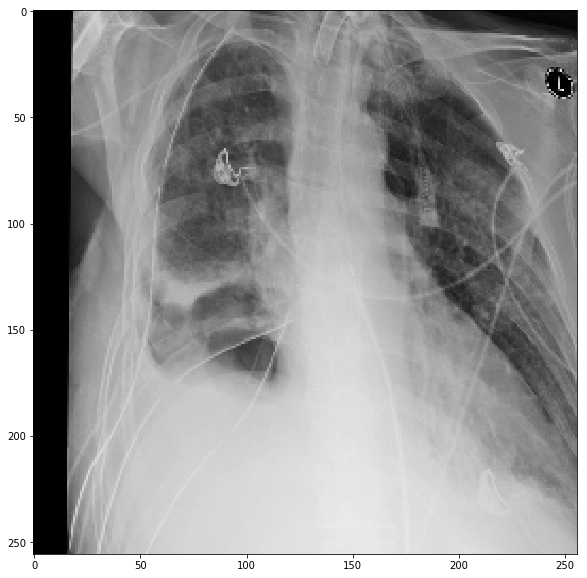

In [105]:
aug = Compose([
    
#         HorizontalFlip(p=.5),
        
        IAAPiecewiseAffine(scale=(0.00, 0.015)),
        RandomGamma(gamma_limit=(80, 110), p=0.8),
        OneOf([
#                CLAHE(clip_limit=1),
#                IAASharpen(alpha=(0.1, 0.2), lightness=(0.5, 1.)),
#                IAAEmboss(alpha=(0.1, 0.2), strength=(0.0, 0.2)),
#                Blur(blur_limit=2),
               GaussNoise()
              ], p=0.8),
        IAAPerspective(scale=(0.08, 0.08), keep_size=True, p=1),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=(-0.2, 0.2), rotate_limit=5, p=0.8, border_mode=cv2.BORDER_CONSTANT),

#         RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
        
#         OneOf([
#                RandomPercentCrop(0.8,0.8),
# #                AdaptivePadIfNeeded(border_mode=cv2.BORDER_CONSTANT),
# #                Compose([AdaptivePadIfNeeded(border_mode=cv2.BORDER_CONSTANT),], p=1),
#                DoNothing(p=1),
#               ],p=1),
        
        # 10% force resize
        # 20% black padding to biggest size
        # 70% crop

        Resize(256, 256, interpolation=cv2.INTER_CUBIC),
    ])
augment_and_show(aug, image)